In [1]:
# Plotting and Visualization
# The most popular general-purpose visualization library is Matplotlib, 
# which mainly focuses on generating static publication-quality 2D and 3D graphs.

# Seaborn is a high-level plotting library which targets statistical data analysis, based on the Matplotlib library.
# line plots, bar plots, contour plots, colormap plots, and 3D surface plots

In [3]:
# To use the object-oriented Matplotlib API, we first need to import its Python modules.
# Matplotlib is imported using the following standard convention:

# as we are working in an IPython environment and more specifically in the Jupyter Notebook
# we have to configure Matplotlib to use the “inline” backend, 
# which results the created figures being displayed directly in this Notebook, rather than in a new window
%matplotlib inline

# import the main Matplotlib module
import matplotlib as mpl

# access to the pyplot submodule from matplotlib that provides the functions that we will use to create new Figure instances
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [4]:
import numpy as np

In [5]:
import sympy

In [ ]:
# A graph in Matplotlib is structured in terms of a Figure instance and one or more Axes instances within the figure.

In [6]:
# we would like to graph the function y(x) = x^3+5x^2+10, together with its first and second derivatives, 
# over the range x ∈ [−5, 2].

x = np.linspace(-5, 2, 1000)

In [14]:
y = x ** 3 + 5 * x ** 2 + 10

In [15]:
y1 = 3 * x ** 2 + 10 * x

In [16]:
y2 = 6 * x + 10

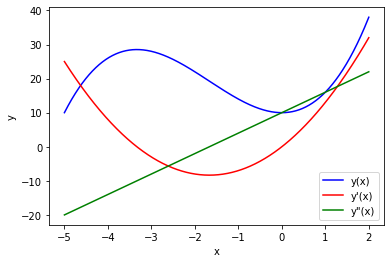

In [19]:
# we need to create Matplotlib Figure and Axes instances, 
# then use the plot method of the Axes instance to plot the data, 
# and set basic graph properties such as x and y axis labels using the set_xlabel and set_ylabel methods 
# and generating a legend using the legend method.

fig, ax = plt.subplots()
ax.plot(x, y, color="blue", label="""y(x)""")
ax.plot(x, y1, color="red", label="""y'(x)""")
ax.plot(x, y2, color="green", label="""y"(x)""")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

In [ ]:
# Figure object is used in matplotlib to represent a graph
# A Figure object can be created using the function plt.figure, 
# which takes several optional keyword arguments for setting figure properties.
# figsize = (width, height), specifying the width and height of the figure canvas in inches.
# specify the color of the figure canvas by setting the facecolor keyword argument.
# use the add_axes method to create a new Axes instance and assign it to a region on the figure canvas.
# to set an overall figure title, we can use suptitle, which takes a string with the title as argument
# save a figure to a file, we can use the savefig method.
# if figsize=(8, 6) and dpi=100, the size of the generated image is 800x600 pixels

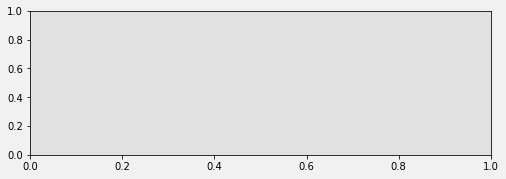

In [20]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1")
# axes coordinates as fractions of the canvas width and height
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")
x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)

Text(0, 0.5, 'y')

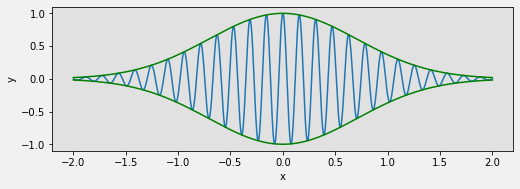

In [22]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1")
# axes coordinates as fractions of the canvas width and height
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")
x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)

ax.plot(x, y1 * y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')
ax.set_xlabel("x")
ax.set_ylabel("y")

# fig.savefig("graph.png", dpi=100, facecolor="#f1f1f1")

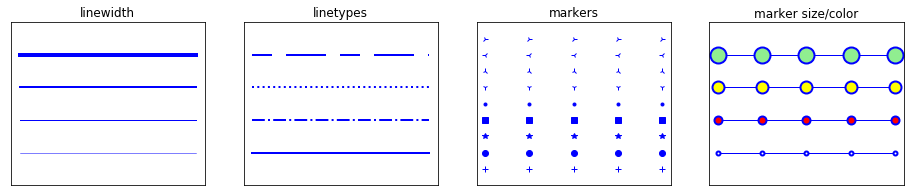

In [41]:
x = np.linspace(-5, 5, 5)
y = np.ones_like(x)

def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax+1)
    ax.set_title(title)
    
fig, axes = plt.subplots(1, 4, figsize=(16,3))

# Line width
linewidths = [0.5, 1.0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
    axes[0].plot(x, y + n, color="blue", linewidth=linewidth)
axes_settings(fig, axes[0], "linewidth", len(linewidths))
        
# Line style
linestyles = ['-', '-.', ':']
for n, linestyle in enumerate(linestyles):
    axes[1].plot(x, y + n, color="blue", lw=2, linestyle=linestyle)

# custom dash style
line, = axes[1].plot(x, y + 3, color="blue", lw=2)
length1, gap1, length2, gap2 = 10, 7, 20, 7
line.set_dashes([length1, gap1, length2, gap2])
axes_settings(fig, axes[1], "linetypes", len(linestyles) + 1)


# marker types
markers = ['+', 'o', '*', 's', '.', '1', '2', '3', '4']
for n, marker in enumerate(markers):
    # lw = shorthand for linewidth, ls = shorthand for linestyle
    # axes[2].plot(x, y + n, color="blue", lw=2, ls='*', marker=marker)
    
    # ValueError: '*' is not a valid value for ls; 
    # supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    
    axes[2].plot(x, y + n, color="blue", lw=2, ls='', marker=marker)
axes_settings(fig, axes[2], "markers", len(markers))
    
    
# marker size and color
markersizecolors = [(4, "white"), (8, "red"), (12, "yellow"), (16, "lightgreen")]
for n, (markersize, markerfacecolor) in enumerate(markersizecolors):
    axes[3].plot(x, y + n, color="blue", lw=1, ls='-', marker='o', markersize=markersize, 
                 markerfacecolor=markerfacecolor, markeredgewidth=2)
axes_settings(fig, axes[3], "marker size/color", len(markersizecolors))

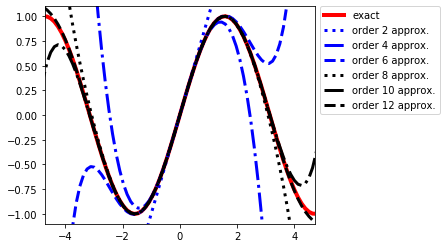

In [42]:
# a symbolic variable for x, and a numerical array with specific values of x
sym_x = sympy.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def sin_expansion(x, n):
    """
    Evaluate the nth order Taylor. series expansion of sin(x) for the numerical values in the array x.
    """
    return sympy.lambdify(sym_x, sympy.sin(sym_x).series(n=n+1).removeO(), 'numpy')(x)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), linewidth=4, color="red", label='exact')
colors = ["blue", "black"]
linestyles = [':', '-.', '--']
for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx // 3], linestyle=linestyles[idx % 3], linewidth=3, 
            label="order %d approx." % (n+1))
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)
    
# place a legend outsize of the Axes
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
# make room for the legend to the right of the Axes
fig.subplots_adjust(right=.75)